In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('autos.csv',encoding='latin_1')

In [2]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Converting german values to english for all categorical features

In [3]:
df['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [4]:
df['seller'].replace({'privat':'private',
                      'gewerblich':'commercial'},
                     inplace = True)
df['seller'].head()

0    private
1    private
2    private
3    private
4    private
Name: seller, dtype: object

In [5]:
df['offerType'].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [6]:
df['offerType'].replace({'Angebot':'offer',
                      'Gesuch':'application'},
                     inplace = True)
df['offerType'].head()

0    offer
1    offer
2    offer
3    offer
4    offer
Name: offerType, dtype: object

In [7]:
df['abtest'].value_counts()

test       192585
control    178943
Name: abtest, dtype: int64

In [8]:
df['vehicleType'].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [9]:
df['vehicleType'].replace({'kleinwagen':'small car',
                      'kombi':'microbus',
                      'cabrio':'convertible',
                      'andere' : 'other'},
                     inplace = True)
df['vehicleType'].head()

0          NaN
1        coupe
2          suv
3    small car
4    small car
Name: vehicleType, dtype: object

In [10]:
df['gearbox'].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [11]:
df['gearbox'].replace({'manuell':'manual',
                      'automatik':'automatic'},
                     inplace = True)
df['gearbox'].head()

0       manual
1       manual
2    automatic
3       manual
4       manual
Name: gearbox, dtype: object

In [12]:
orig_list = list(df['model'].value_counts().index)
converted_list = ['golf','other','3s','polo','corsa','astra','passat','a4','cclass','5s','eclass','a3','a6','focus','fiesta','transporter','twingo','2series','fortwo','aclass','vectra','1s','mondeo','clio','touran','3series','punto','zafira','megane','ibiza','ka','lupo','xseries','octavia','cooper','fabia','clk','micra','caddy','80','sharan','scenic','omega','slk','leon','laguna','civic','tt','1stseries','6series','iseries','galaxy','mclass','7s','meriva','yaris','great','mxseries','a5','kangoo','911','bclass','500','tiguan','vito','escort','one','arosa','zseries','bora','colt','beetle','berlingo','sprinter','tigra','v40','transit','touareg','fox','swift','insignia','c_max','corolla','panda','seicento','sl','v70','4series','scirocco','156','a1','primera','espace','grand','stilo','almera','a8','147','avensis','qashqai','eos','c3','c5','signum','Beetle','s_max','5series','q5','c4','matiz','ducato','agila','aygo','viano','getz','601','combo','100','carisma','cayenne','boxster','alhambra','cordoba','c2','superb','c1','kuga','forfour','rio','jetta','cuore','a2','altea','cadet','rav','picanto','sorento','mseries','accord','crseries','up','q7','vivaro','toledo','voyager','xcseries','Bravo','santa','doblo','logan','mode','verso','ptcruiser','cl','sportage','jazz','fusion','sandero','mustang','roomster','carnival','6s','ceed','gallant','v50','q3','tucson','lancer','auris','impreza','phaeton','freelander','glk','calibra','pajero','x_trail','850','159','jimny','ypsilon','spider','duster','clubman','yeti','cseries','cc','roadster','cherokee','x_type','gclass','captiva','vclass','wrangler','legacy','s60','300c','rxseries','defender','justy','sirion','forester','outlander','grade','niva','s_type','spark','r19','navara','cxseries','aveo','900','antara','90','juke','discovery','exeo','range_rover_sport','kalos','range_rover','citigo','lanos','mii','crossfire','range_rover_evoque','gl','nubira','move','lybra','145','v60','croma','amarok','delta','terios','lodgy','9000','charade','b_max','musa','materia','200','kappa','samara','elefantino','i3','kalina','serie_2','rangerover','serie_3','serie_1','discovery_sport']

In [13]:
df['model'].replace(dict(zip(orig_list,converted_list)),inplace = True)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manual,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manual,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [14]:
df['monthOfRegistration'].value_counts()

0     37675
3     36170
6     33167
4     30918
5     30631
7     28958
10    27337
11    25489
12    25380
9     25074
1     24561
8     23765
2     22403
Name: monthOfRegistration, dtype: int64

In [15]:
df['fuelType'].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [16]:
df['fuelType'].replace({'benzin':'petrol',
                      'andere':'other',
                      'elektro':'electric'},
                     inplace = True)
df['fuelType'].head()

0    petrol
1    diesel
2    diesel
3    petrol
4    diesel
Name: fuelType, dtype: object

In [17]:
df['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [18]:
df['notRepairedDamage'].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [19]:
df['notRepairedDamage'].replace({'nein':'No',
                      'ja':'Yes'},
                     inplace = True)
df['notRepairedDamage'].head()

0    NaN
1    Yes
2    NaN
3     No
4     No
Name: notRepairedDamage, dtype: object

In [20]:
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,Yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


# Exploring the dataset

In [21]:
df.shape

(371528, 20)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [23]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null datetime64[ns]
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null datetime64[ns]
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSe

In [25]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,Yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,No,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manual,69,fabia,90000,7,diesel,skoda,No,2016-03-31,0,60437,2016-04-06 10:17:21


# Handling missing values

In [26]:
def get_missing_val_count_df(df):
  missing_count_list = []
  for col in df.columns:
    missing_count_list.append(df[col].isnull().sum())
  missing_count_df = pd.DataFrame(missing_count_list,columns=['count'],index = df.columns)
  return missing_count_df.sort_values('count',ascending=False)
get_missing_val_count_df(df)

,count
notRepairedDamage,72060
vehicleType,37869
fuelType,33386
model,20484
gearbox,20209
kilometer,0
postalCode,0
nrOfPictures,0
dateCreated,0
brand,0


### Price

In [27]:
df['price'].describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
sns.boxplot(df['price'])

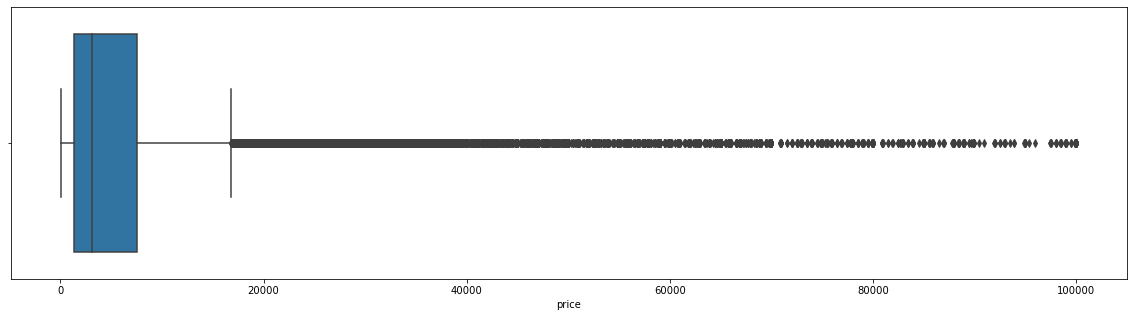

In [29]:
plt.figure(figsize = (20,5))
sns.boxplot(df[(df['price']>=100) & (df['price']<=100000)]['price'])

### Outlier detection using Isolation Forest

In [30]:
dfprice = df[(df['price'].isnull() == False)]['price']

[[0.00000000e+00]
 [5.78015500e+03]
 [1.15603100e+04]
 ...
 [2.14747209e+09]
 [2.14747787e+09]
 [2.14748365e+09]]


Text(0.5, 1.0, 'price')

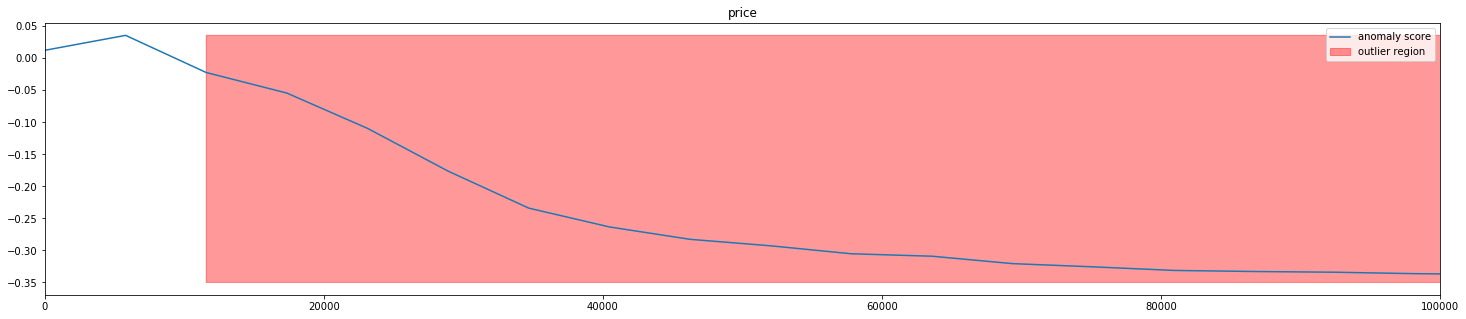

In [31]:
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(dfprice.values.reshape(-1,1))

xx = np.linspace(dfprice.min(), dfprice.max(), len(df)).reshape(-1,1)
print(xx)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(25,5))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
plt.legend()
plt.xlim(0, 100000)
# plt.axis([0,100000,0,0])
plt.title('price')

If we see from the above plot, almost all data point above 12000 seems to come under outliers, but dropping all of those does not seem to be a feasible solution. We can also see that data points after 100000 have consistently very low anamoly score, so we can go ahead and drop those data points, and the remaining outliers can be handled further using transformation techniques. Also data points with price below 100 also seem to be very low as far as price of a used car is concerned, so we will also drop those data points which have price below 100.

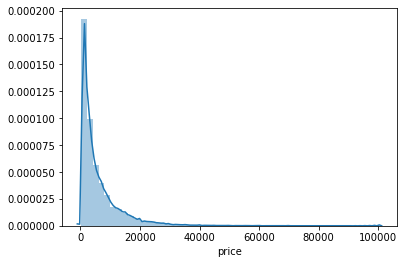

In [32]:
sns.distplot(df[(df['price']>=100) & (df['price']<=100000)]['price'])

In [33]:
df[(df['price']>=100) & (df['price']<=100000)].shape

(357805, 20)

In [34]:
df2 = df[(df['price']>=100) & (df['price']<=100000)]

In [35]:
get_missing_val_count_df(df2)

,count
notRepairedDamage,65197
vehicleType,32947
fuelType,28773
model,17703
gearbox,16621
kilometer,0
postalCode,0
nrOfPictures,0
dateCreated,0
brand,0


### Kilometers
Number of kilometers car has driven

In [36]:
df2['kilometer'].describe()

count    357805.000000
mean     125871.606042
std       39527.680682
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

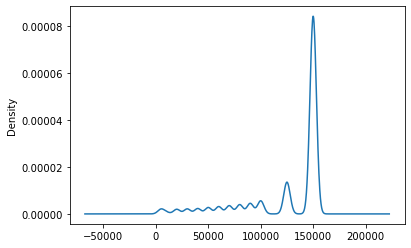

In [37]:
df2['kilometer'].plot(kind = 'density')

As we can see, about only 35 percent of the data have kilometers driven less than 125000 and the rest 65 percent of the data value is 150000. This could be due to a default value set to the feature while creating a new ad which the ad creators did not change and kept it as default. So this could be a **DATA COLLECTION ERROR**

In [38]:
df2.loc[df['kilometer'] == 150000,'kilometer'] = np.nan

### NotRepairedDamaged 
If the car has a damage which is not repaired yet

In [39]:
df2['notRepairedDamage'].describe()

count     292608
unique         2
top           No
freq      258897
Name: notRepairedDamage, dtype: object

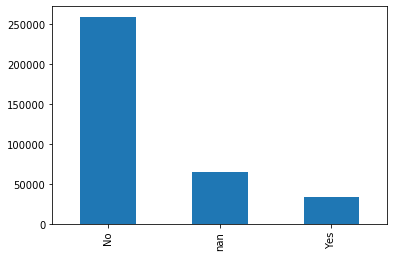

In [40]:
df2['notRepairedDamage'].value_counts(dropna = False).plot(kind = 'bar')

MICE imputation of the values for notRepairedDamaged does not really make sense because we will not be able to determine whether the car was damaged or not by using other features in the dataset. So we will drop the NA values.

In [41]:
df2 = df2[df2['notRepairedDamage'].isnull() == False]

### VehicleType

In [42]:
df2['vehicleType'].describe()

count        276862
unique            8
top       limousine
freq          80413
Name: vehicleType, dtype: object

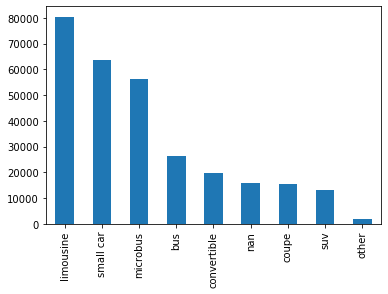

In [43]:
df2['vehicleType'].value_counts(dropna = False).plot(kind = 'bar')

It does have some missing values which we will consider imputing using MICE imputer.

### FuelType

In [44]:
df2['fuelType'].describe()

count     277281
unique         7
top       petrol
freq      180463
Name: fuelType, dtype: object

petrol      180463
diesel       91574
NaN          15327
lpg           4311
cng            504
hybrid         250
other           94
electric        85
Name: fuelType, dtype: int64


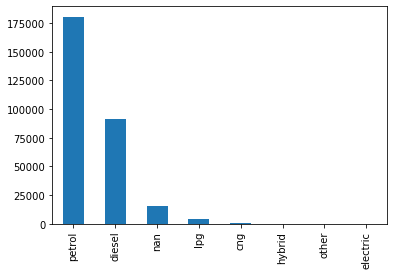

In [45]:
print(df2['fuelType'].value_counts(dropna = False))
df2['fuelType'].value_counts(dropna = False).plot(kind = 'bar')

MICE imputation of the values for fuelType does not really make sense because we will not be able to determine what type of fuelType the car belongs to by using other features in the dataset. So we will drop the NA values.

In [46]:
df2 = df2[df2['fuelType'].isnull() == False]

### Model

In [47]:
df2['model'].describe()

count     269435
unique       250
top         golf
freq       22025
Name: model, dtype: object

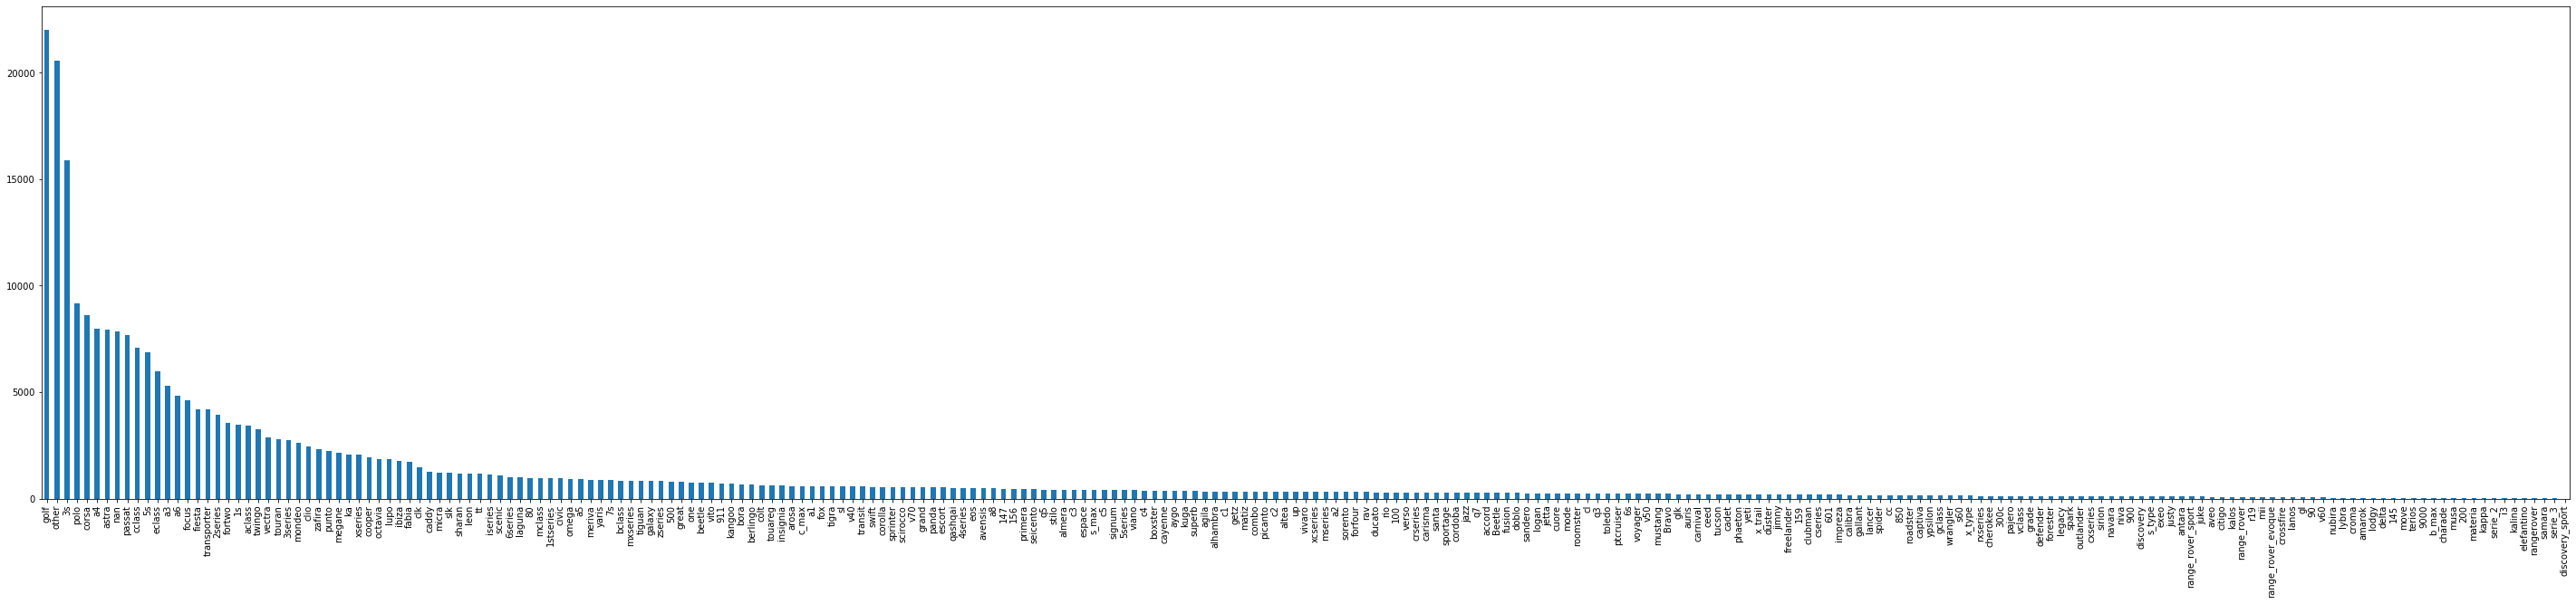

In [48]:
plt.figure(figsize=(50,10))
df2['model'].value_counts(dropna = False).plot(kind = 'bar')

MICE imputation of the values for model does not really make sense because we will not be able to determine what type of model the car belongs to by using other features in the dataset. So we will drop the NA values.

In [49]:
df2 = df2[df2['model'].isnull() == False]

### Gearbox

In [50]:
df2['gearbox'].describe()

count     264368
unique         2
top       manual
freq      203206
Name: gearbox, dtype: object

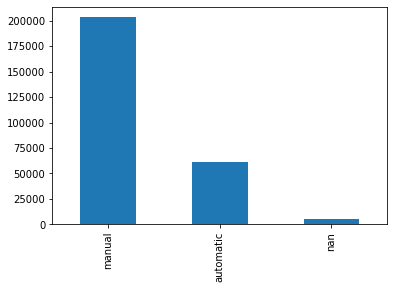

In [51]:
df2['gearbox'].value_counts(dropna = False).plot(kind = 'bar')

MICE imputation of the values for gearBox does not really make sense because we will not be able to determine what type of gearBox the car belongs to by using other features in the dataset. So we will drop the NA values.

In [52]:
df2 = df2[df2['gearbox'].isnull() == False]

### Seller

In [53]:
df2['seller'].describe()

count      264368
unique          2
top       private
freq       264366
Name: seller, dtype: object

private       264366
commercial         2
Name: seller, dtype: int64


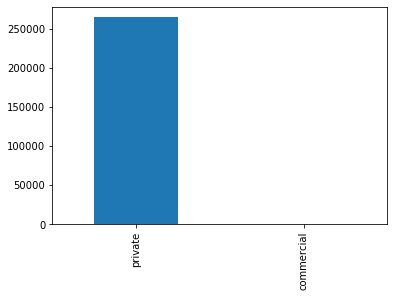

In [54]:
print(df2['seller'].value_counts(dropna = False))
df2['seller'].value_counts(dropna = False).plot(kind = 'bar')

The data in this features seems extremely imbalanced. So we will consider dropping this feature.

### OfferType

In [55]:
df2['offerType'].describe()

count     264368
unique         2
top        offer
freq      264367
Name: offerType, dtype: object

offer          264367
application         1
Name: offerType, dtype: int64


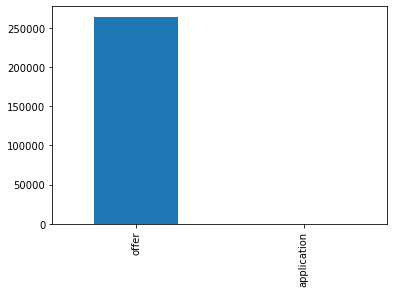

In [56]:
print(df2['offerType'].value_counts(dropna = False))
df2['offerType'].value_counts(dropna = False).plot(kind = 'bar')

The data in this features seems extremely imbalanced. So we will consider dropping this feature.

### ABTEST

In [57]:
df2['abtest'].describe()

count     264368
unique         2
top         test
freq      137172
Name: abtest, dtype: object

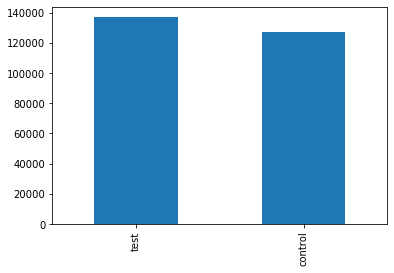

In [58]:
df2['abtest'].value_counts(dropna = False).plot(kind = 'bar')

### Year Of Registration

In [59]:
df2['yearOfRegistration'].describe()

count    264368.000000
mean       2003.737873
std          14.635000
min        1600.000000
25%        2000.000000
50%        2004.000000
75%        2008.000000
max        6200.000000
Name: yearOfRegistration, dtype: float64

In [60]:
df2.loc[(df2['yearOfRegistration']<1923) | (df2['yearOfRegistration']>2020),'yearOfRegistration'] = np.nan

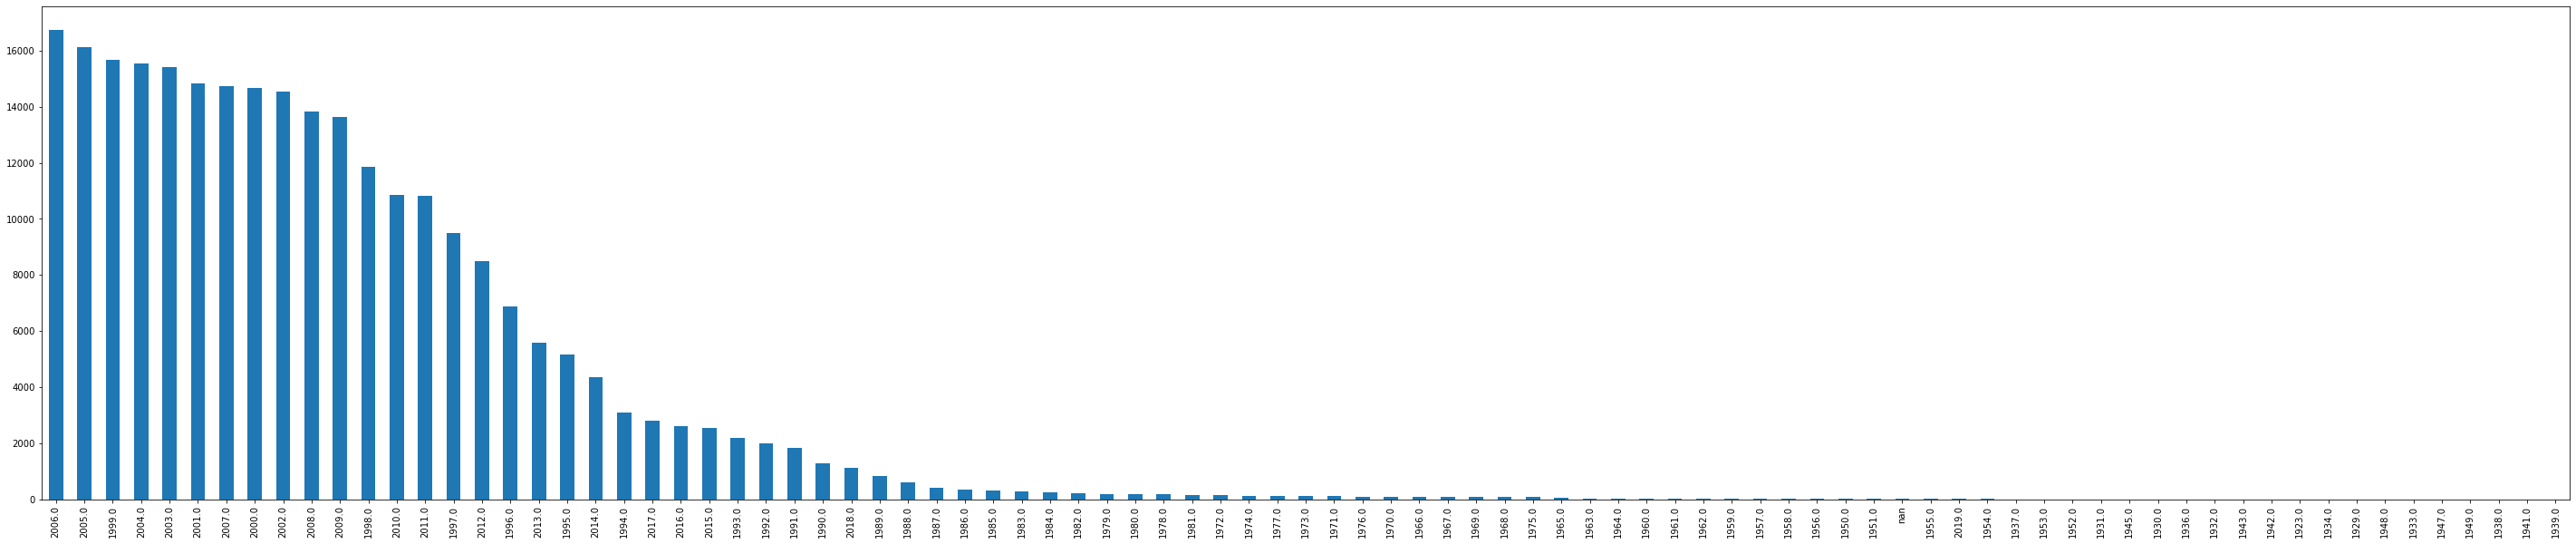

In [61]:
plt.figure(figsize=(50,10))
df2['yearOfRegistration'].value_counts(dropna = False).plot(kind = 'bar')

In [62]:
df2 = df2[df2['yearOfRegistration'].isnull() == False]

### Power PS

In [63]:
df2['powerPS'].describe()

count    264360.000000
mean        125.230837
std         145.023281
min           0.000000
25%          75.000000
50%         116.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

[[0.00000000e+00]
 [5.38318884e-02]
 [1.07663777e-01]
 ...
 [1.99998923e+04]
 [1.99999462e+04]
 [2.00000000e+04]]


Text(0.5, 1.0, 'Power PS')

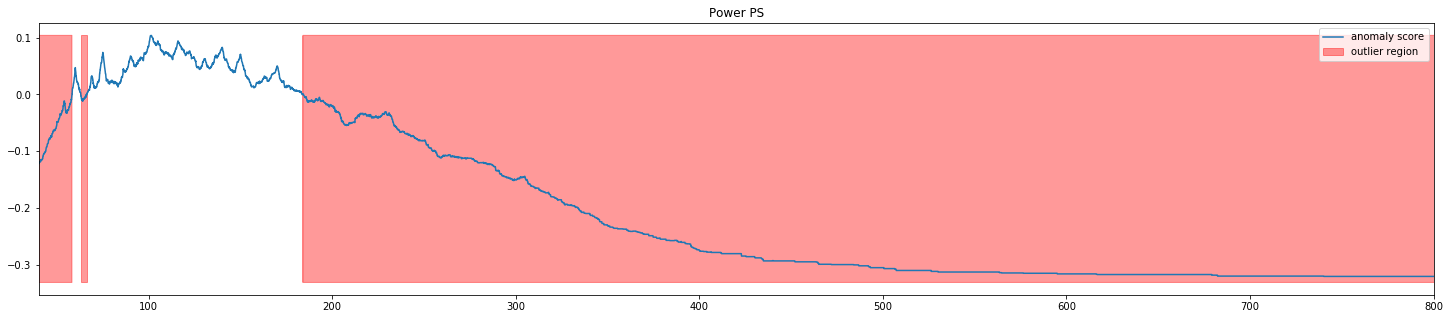

In [64]:
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(df2['powerPS'].values.reshape(-1,1))

xx = np.linspace(df2['powerPS'].min(), df2['powerPS'].max(), len(df)).reshape(-1,1)
print(xx)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(25,5))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
plt.legend()
plt.xlim(40, 800)
plt.title('Power PS')

In [65]:
df2 = df2[(df2['powerPS']<800) & (df2['powerPS']>40)]

If we see from the above plot, almost all data point above 200 seems to come under outliers, but dropping all of those does not seem to be a feasible solution. We can also see that data points after 800 have consistently very low anamoly score, so we can go ahead and drop those data points, and the remaining outliers can be handled further using transformation techniques. Also data points with powerps below 40 also seem to be very low as far as price of a used car is concerned, so we will also drop those data points which have powerps below 40.

### Brand

In [66]:
df2['brand'].describe()

count         252240
unique            39
top       volkswagen
freq           53191
Name: brand, dtype: object

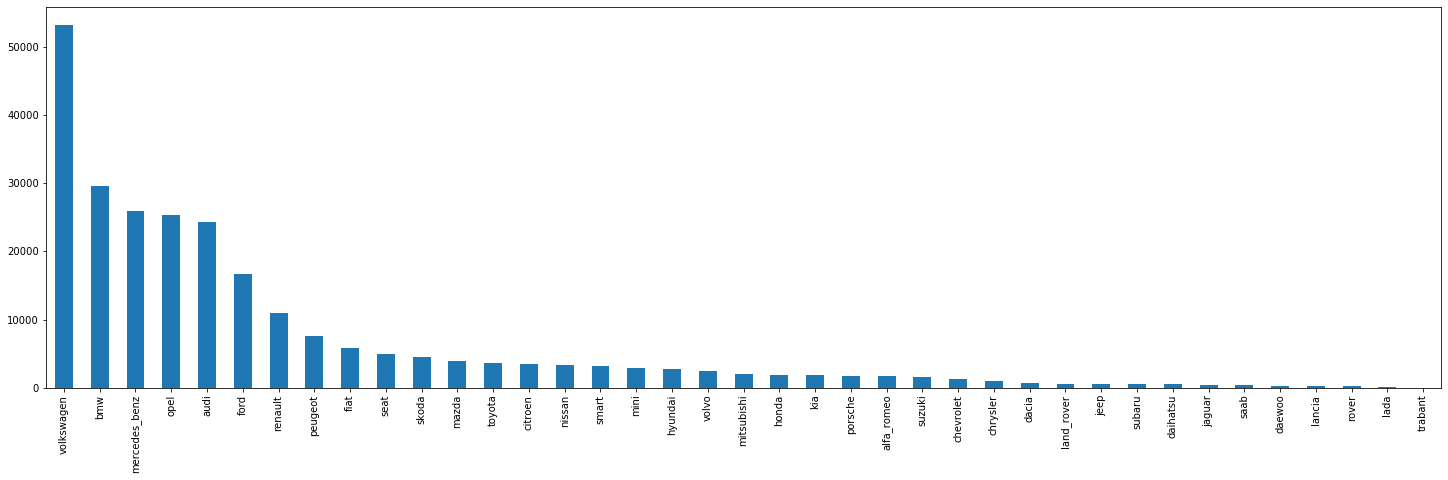

In [67]:
plt.figure(figsize=(25,7))
df2['brand'].value_counts(dropna = False).plot(kind = 'bar')

### Month Of Registration

In [68]:
df2['monthOfRegistration'].describe()

count    252240.000000
mean          6.200182
std           3.458851
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: monthOfRegistration, dtype: float64

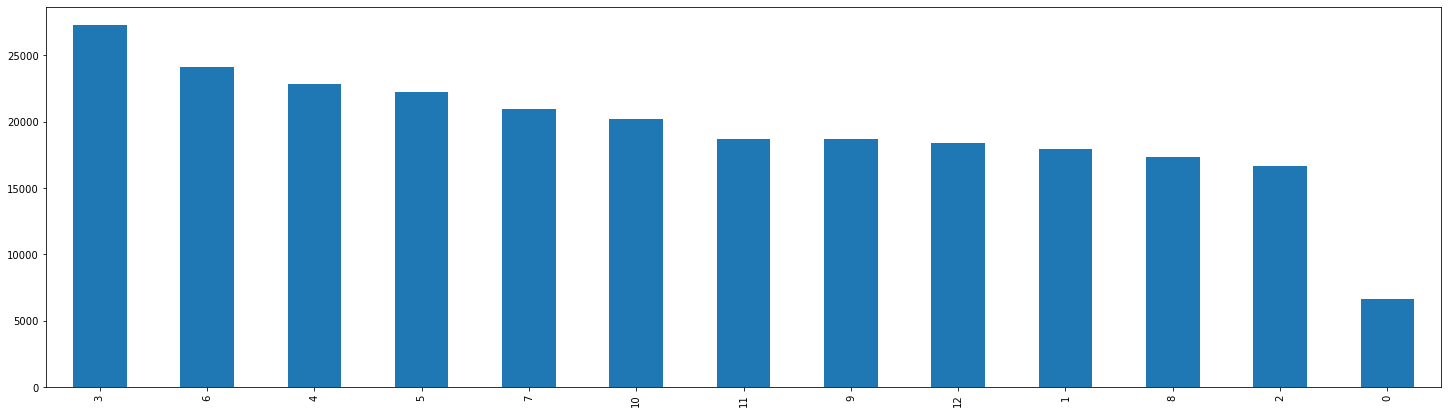

In [69]:
plt.figure(figsize=(25,7))
df2['monthOfRegistration'].value_counts(dropna = False).plot(kind = 'bar')

In [70]:
df2 = df2[df2['monthOfRegistration'] != 0]

### Number of days online

In [71]:
val = list(df2['lastSeen'] - df2['dateCreated'])
days = [obj.days for obj in val]
for i in range(len(days)):
  if days[i] < 0:
    days[i] = np.nan
df2['No_of_days_online'] = days

### Age of Vehicle

In [72]:
import datetime

def calculateAge(yr,mnth):
    today_date = datetime.datetime.today()
    years = today_date.year - yr
    month = today_date.month - mnth
    ageindecimal = years + month/12
    return round(ageindecimal,2)

In [73]:
df2['ageOfVehicle'] = list(map(calculateAge,df2['yearOfRegistration'],df2['monthOfRegistration']))

In [74]:
df3 = df2[['kilometer','notRepairedDamage', 'vehicleType', 'fuelType', 'gearbox', 'ageOfVehicle', 'model', 'brand', 'powerPS', 'abtest', 'No_of_days_online', 'price']]

In [75]:
df3.head()

,kilometer,notRepairedDamage,vehicleType,fuelType,gearbox,ageOfVehicle,model,brand,powerPS,abtest,No_of_days_online,price
3,NaN,No,small car,petrol,manual,19.00,golf,volkswagen,75,test,0,1500
4,90000.0,No,small car,diesel,manual,11.92,fabia,skoda,69,test,6,3600
5,NaN,Yes,limousine,petrol,manual,24.67,3s,bmw,102,test,2,650
6,NaN,No,convertible,petrol,manual,15.83,2series,peugeot,109,test,4,2200
10,NaN,No,limousine,petrol,manual,15.50,3series,mazda,105,control,11,2000


## Imputation

In [76]:
cat_cols = ['notRepairedDamage', 'vehicleType', 'fuelType', 'gearbox', 'model', 'brand','abtest']

In [77]:
from sklearn.preprocessing import OrdinalEncoder
# Create dictionary for Ordinal encoders
ordinal_enc_dict = {}
# Loop over columns to encode
for col_name in cat_cols:
  # Create ordinal encoder for the column
  ordinal_enc_dict[col_name] = OrdinalEncoder()
  # Select the nin-null values in the column
  col = df3[col_name]
  col_not_null = col[col.notnull()]
  reshaped_vals = col_not_null.values.reshape(-1, 1)
  # Encode the non-null values of the column
  encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
  # Replace the ambience column with ordinal values
  df3.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [78]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
Iterative_imputer = IterativeImputer()
df3_MICE = df3.copy(deep=True)
df3_MICE.iloc[:, :] = np.round(Iterative_imputer.fit_transform(df3_MICE))

In [79]:
# df3_MICE.loc[df3_MICE['fuelType']>6,'fuelType'] = 6
# df3_MICE.loc[df3_MICE['fuelType']<0,'fuelType'] = 0

In [80]:
for col in cat_cols:
  reshaped_col = df3_MICE[col].values.reshape(-1, 1)
  df3_MICE[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col)

In [81]:
df_final = df3_MICE

In [82]:
df_final

,kilometer,notRepairedDamage,vehicleType,fuelType,gearbox,ageOfVehicle,model,brand,powerPS,abtest,No_of_days_online,price
3,94585.0,No,small car,petrol,manual,19.0,golf,volkswagen,75.0,test,0.0,1500.0
4,90000.0,No,small car,diesel,manual,12.0,fabia,skoda,69.0,test,6.0,3600.0
5,106841.0,Yes,limousine,petrol,manual,25.0,3s,bmw,102.0,test,2.0,650.0
6,97773.0,No,convertible,petrol,manual,16.0,2series,peugeot,109.0,test,4.0,2200.0
10,96256.0,No,limousine,petrol,manual,16.0,3series,mazda,105.0,control,11.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
371517,98535.0,No,limousine,diesel,manual,10.0,golf,volkswagen,140.0,test,5.0,7900.0
371520,113368.0,Yes,limousine,petrol,manual,16.0,leon,seat,225.0,control,0.0,3200.0
371524,125000.0,No,convertible,petrol,automatic,20.0,fortwo,smart,101.0,test,6.0,1199.0
371525,103922.0,No,bus,diesel,manual,24.0,transporter,volkswagen,102.0,test,19.0,9200.0


# UNIVARIATE ANALYSIS

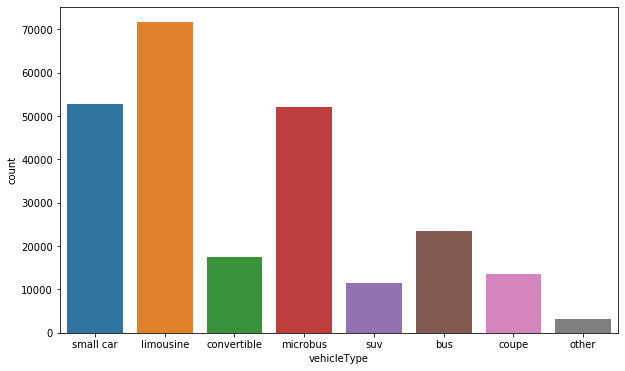

In [90]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'vehicleType',data = df_final)

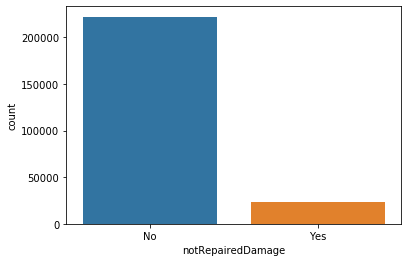

In [91]:
sns.countplot(x = 'notRepairedDamage',data = df_final)

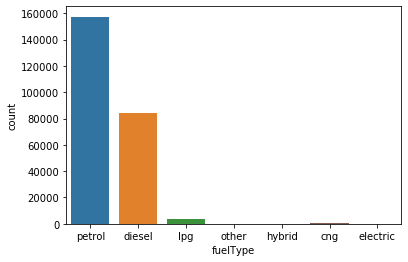

In [92]:
sns.countplot(x = 'fuelType',data = df_final)

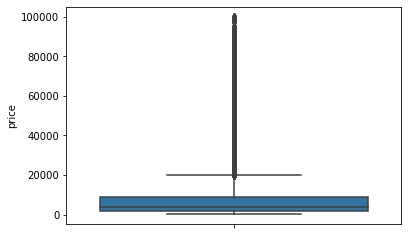

In [93]:
sns.boxplot(y = 'price',data = df_final)

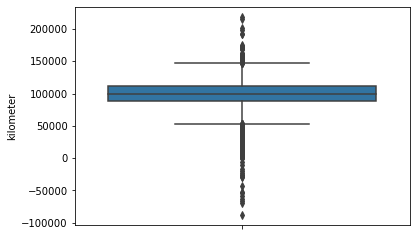

In [94]:
sns.boxplot(y = 'kilometer',data = df_final)

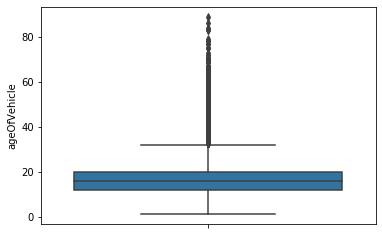

In [95]:
sns.boxplot(y = 'ageOfVehicle',data = df_final)

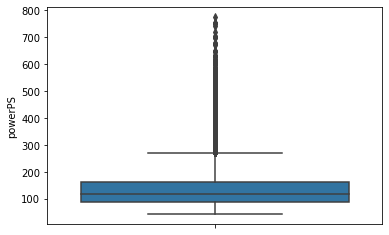

In [96]:
sns.boxplot(y = 'powerPS',data = df_final)

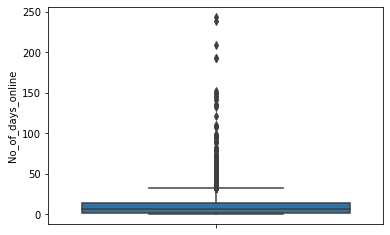

In [97]:
sns.boxplot(y = 'No_of_days_online',data = df_final)

# BIVARIATE ANALYSIS

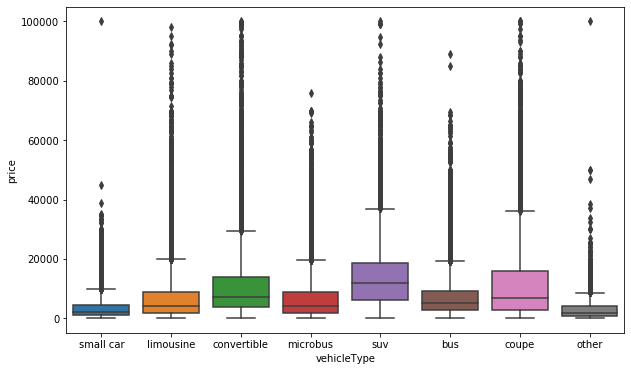

In [87]:
plt.subplot(2,2,1)
plt.figure(figsize =(10,6))
sns.boxplot(y = 'price',x='vehicleType',data = df_final)

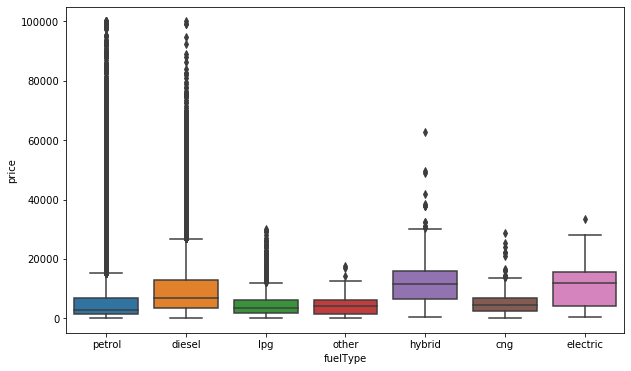

In [99]:
plt.figure(figsize = (10,6))
sns.boxplot(y = 'price',x='fuelType',data = df_final)

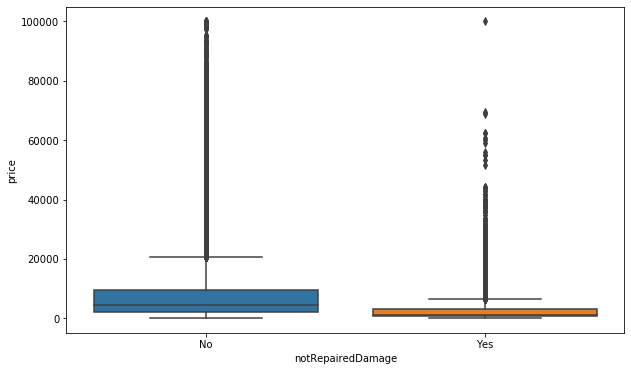

In [100]:
plt.figure(figsize = (10,6))
sns.boxplot(y = 'price',x='notRepairedDamage',data = df_final)

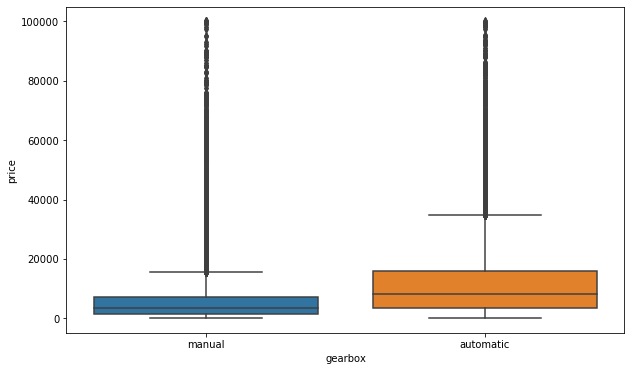

In [101]:
plt.figure(figsize = (10,6))
sns.boxplot(y = 'price',x='gearbox',data = df_final)

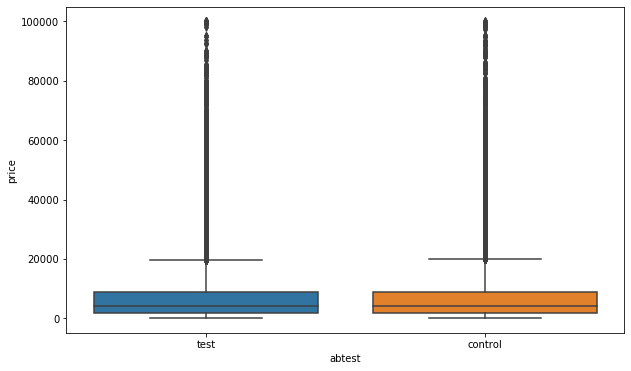

In [102]:
plt.figure(figsize = (10,6))
sns.boxplot(y = 'price',x='abtest',data = df_final)

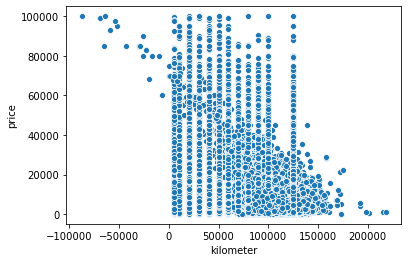

In [105]:
sns.scatterplot(y = 'price',x =  'kilometer',data = df_final)

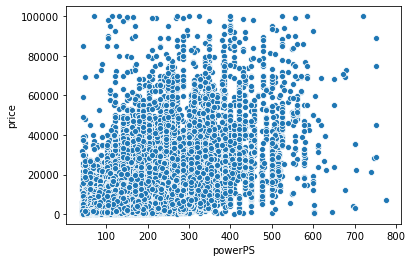

In [108]:
sns.scatterplot(y = 'price',x = 'powerPS',data = df_final)

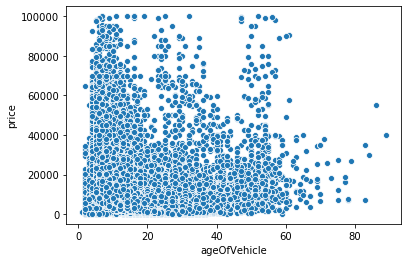

In [109]:
sns.scatterplot(y = 'price',x = 'ageOfVehicle',data = df_final)

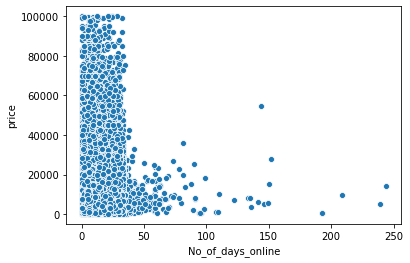

In [112]:
sns.scatterplot(y ='price',x= 'No_of_days_online',data = df_final)

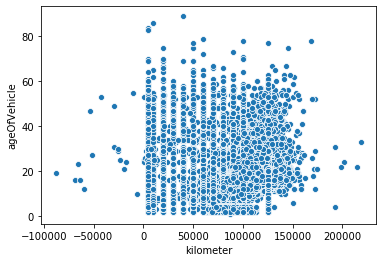

In [114]:
sns.scatterplot(x ='kilometer',y= 'ageOfVehicle',data = df_final)

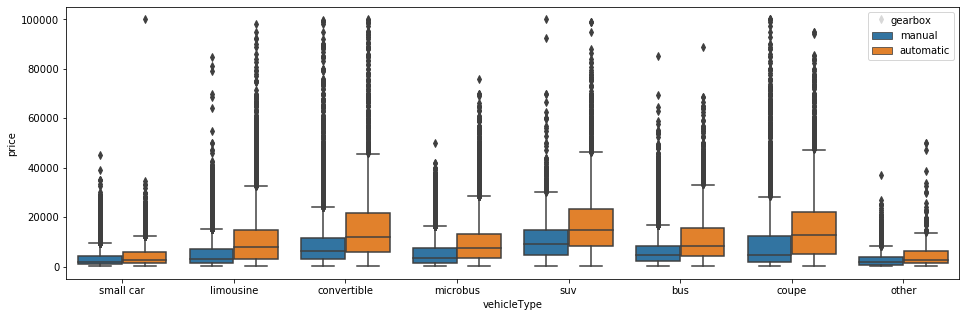

In [117]:
plt.figure(figsize = (16,5))
sns.boxplot(y = 'price',x = 'vehicleType',hue = 'gearbox',data = df_final)

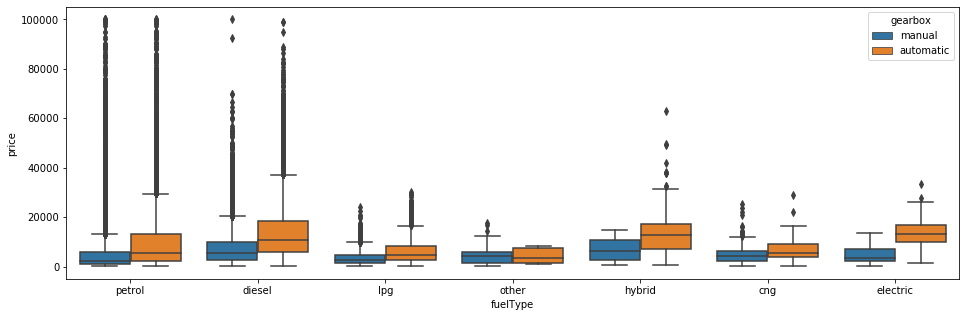

In [120]:
plt.figure(figsize = (16,5))
sns.boxplot(y = 'price',x = 'fuelType',hue = 'gearbox',data = df_final)

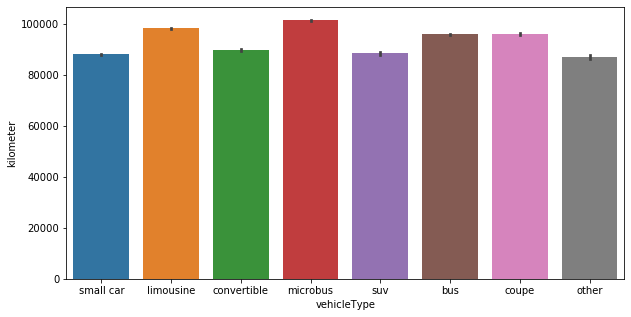

In [154]:
plt.figure(figsize = (10,5))
sns.barplot(y = 'kilometer',x = 'vehicleType',data = df_final)

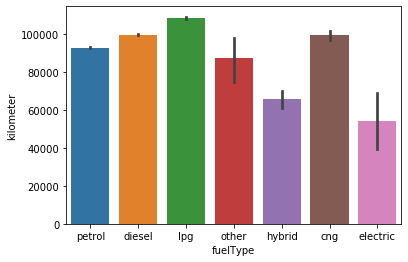

In [142]:
sns.barplot(y = 'kilometer',x = 'fuelType',data = df_final)

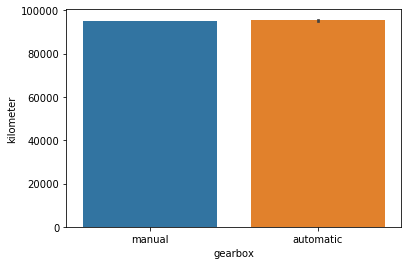

In [143]:
sns.barplot(y = 'kilometer',x = 'gearbox',data = df_final)

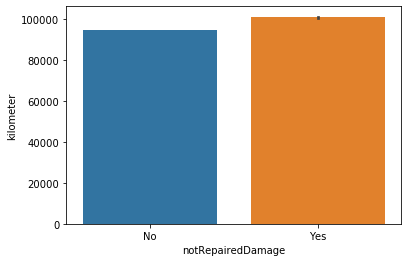

In [144]:
sns.barplot(y = 'kilometer',x = 'notRepairedDamage',data = df_final)

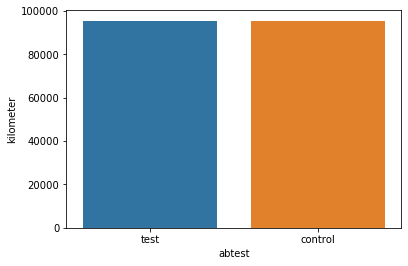

In [145]:
sns.barplot(y = 'kilometer',x = 'abtest',data = df_final)

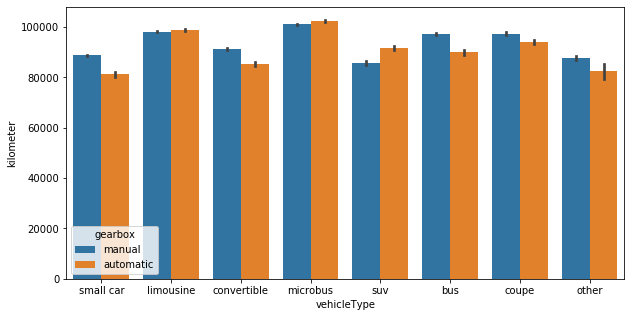

In [155]:
plt.figure(figsize = (10,5))
sns.barplot(y = 'kilometer',x = 'vehicleType',hue = 'gearbox',data = df_final)

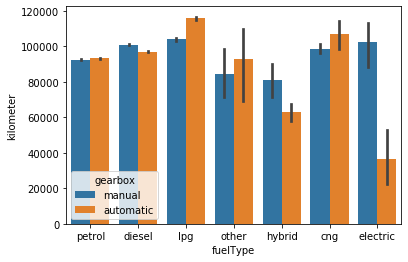

In [147]:
sns.barplot(y = 'kilometer',x = 'fuelType',hue = 'gearbox',data = df_final)

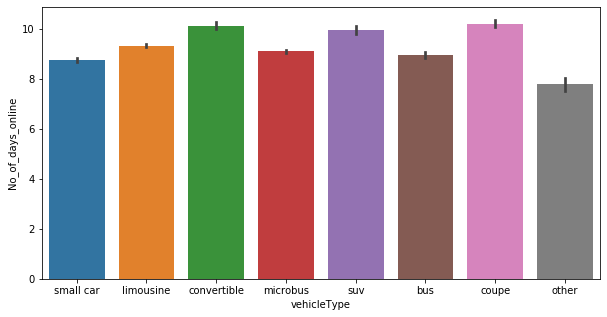

In [156]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'vehicleType',y = 'No_of_days_online',data = df_final)

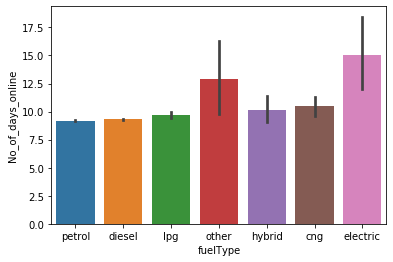

In [132]:
sns.barplot(x = 'fuelType',y = 'No_of_days_online',data = df_final)

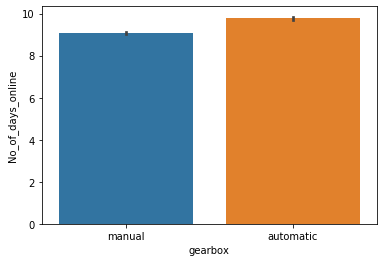

In [133]:
sns.barplot(x = 'gearbox',y = 'No_of_days_online',data = df_final)

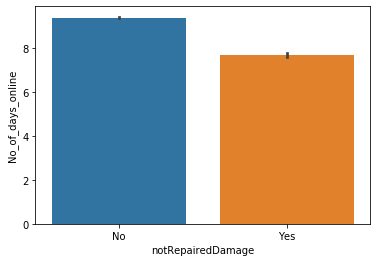

In [134]:
sns.barplot(x = 'notRepairedDamage',y = 'No_of_days_online',data = df_final)

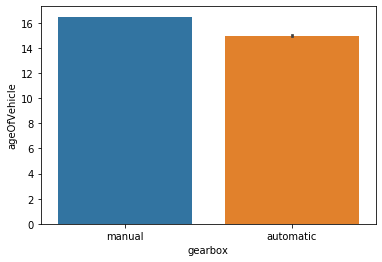

In [135]:
sns.barplot(x = 'gearbox',y = 'ageOfVehicle',data = df_final)

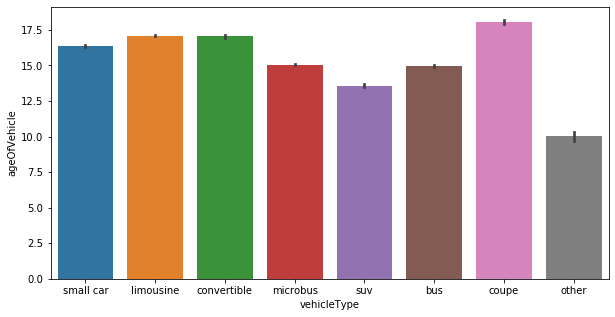

In [157]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'vehicleType',y = 'ageOfVehicle',data = df_final)

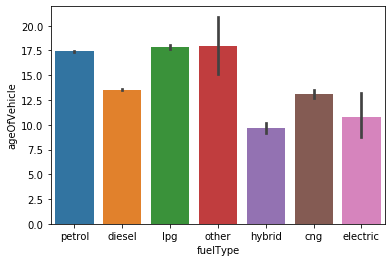

In [137]:
sns.barplot(x = 'fuelType',y = 'ageOfVehicle',data = df_final)

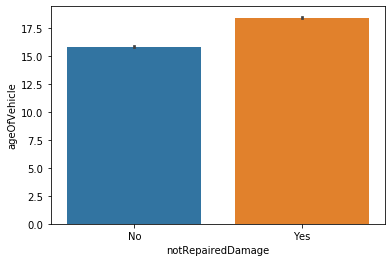

In [148]:
sns.barplot(x = 'notRepairedDamage',y = 'ageOfVehicle',data = df_final)

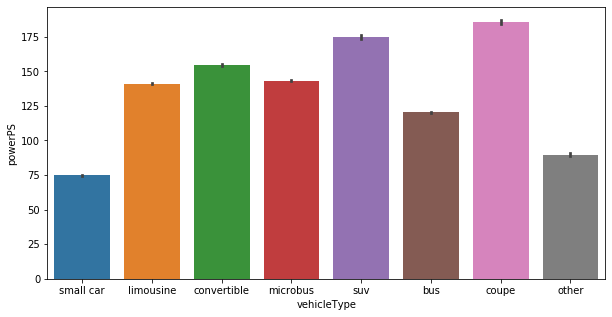

In [159]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'vehicleType',y = 'powerPS',data = df_final)

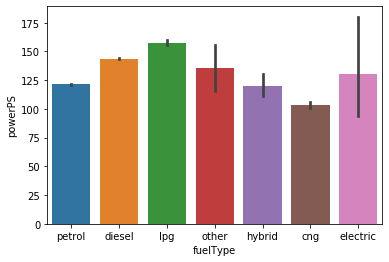

In [150]:
sns.barplot(x = 'fuelType',y = 'powerPS',data = df_final)

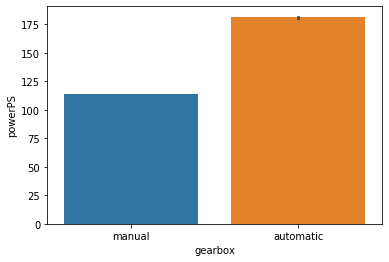

In [152]:
sns.barplot(x = 'gearbox',y = 'powerPS',data = df_final)